In [1]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data[:, (0, 6)] # alcohol, flavanoids
y = (wine.target == 2).astype(int) # class_2
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[13,  0.5]])

In [2]:
y_pred

array([1])

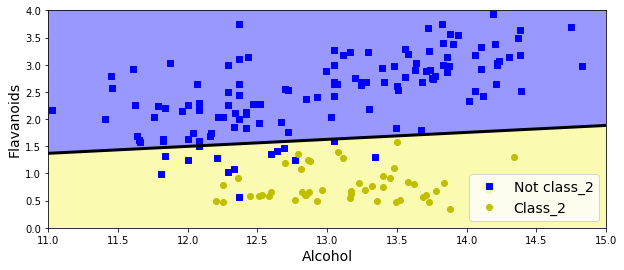

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [11, 15, 0, 4]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not class_2")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Class_2")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Alcohol", fontsize=14)
plt.ylabel("Flavanoids", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

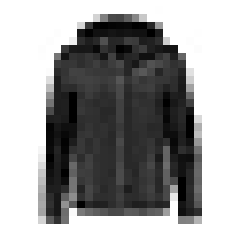

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
weights, biases = model.layers[1].get_weights()
weights

array([[-0.0281466 , -0.00043187, -0.01580833, ...,  0.04713748,
         0.00302128, -0.06993003],
       [ 0.02976022,  0.06845444, -0.06269031, ..., -0.06648135,
        -0.07420857, -0.0658021 ],
       [ 0.03411184,  0.0654536 ,  0.03726425, ..., -0.03393585,
        -0.06848694, -0.02883022],
       ...,
       [ 0.06698991,  0.05225077, -0.02482817, ..., -0.037212  ,
         0.01985958, -0.02976555],
       [-0.04784364,  0.01609419, -0.06223211, ..., -0.03680152,
        -0.03527   ,  0.06977244],
       [-0.0705869 , -0.03991923,  0.02835238, ..., -0.02794292,
        -0.01348174,  0.05101146]], dtype=float32)

In [14]:
weights.shape

(784, 300)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
biases.shape

(300,)

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd",
            metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 135us/sample - loss: 0.7167 - accuracy: 0.7634 - val_loss: 0.5134 - val_accuracy: 0.8260
Epoch 2/30
55000/55000 [==============================] - 8s 137us/sample - loss: 0.4902 - accuracy: 0.8293 - val_loss: 0.4391 - val_accuracy: 0.8516
Epoch 3/30
55000/55000 [==============================] - 7s 123us/sample - loss: 0.4456 - accuracy: 0.8428 - val_loss: 0.4303 - val_accuracy: 0.8544
Epoch 4/30
55000/55000 [==============================] - 7s 133us/sample - loss: 0.4185 - accuracy: 0.8529 - val_loss: 0.4018 - val_accuracy: 0.8588
Epoch 5/30
55000/55000 [==============================] - 7s 132us/sample - loss: 0.3974 - accuracy: 0.8592 - val_loss: 0.3804 - val_accuracy: 0.8718
Epoch 6/30
55000/55000 [==============================] - 7s 132us/sample - loss: 0.3817 - accuracy: 0.8650 - val_loss: 0.3811 - val_accuracy: 0.8642
Epoch 7/30
55000/55000 [===========================

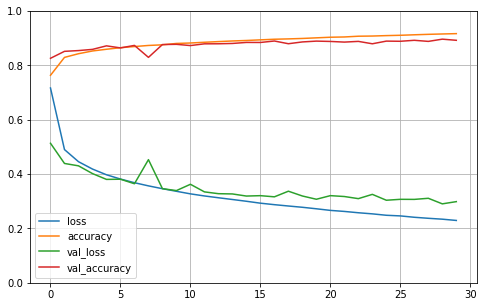

In [19]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 94us/sample - loss: 65.7689 - accuracy: 0.8468


[65.76892659015655, 0.8468]

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [23]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [24]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP Using the Sequential API

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.utils import resample

stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_class_0 = stroke[stroke['stroke'] == 0]
stroke_class_1 = stroke[stroke['stroke'] == 1]

stroke_class_1_upsampled = resample(stroke_class_1,
                                    replace=True, 
                                    n_samples=len(stroke_class_0), 
                                    random_state=42)  

stroke_upsampled = pd.concat([stroke_class_0, stroke_class_1_upsampled])
stroke = stroke_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
stroke = stroke.set_index("id")

stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
40513,Female,21.0,0,0,No,Private,Urban,90.16,28.9,smokes,0
13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
12857,Male,55.0,0,0,Yes,Self-employed,Rural,73.57,28.0,smokes,0
38673,Female,51.0,0,0,Yes,Private,Rural,105.63,32.8,never smoked,0
71673,Female,79.0,0,0,Yes,Private,Urban,110.85,24.1,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
67432,Female,60.0,0,0,Yes,Private,Urban,97.43,26.4,smokes,1
62861,Female,78.0,0,0,Yes,Private,Urban,67.29,24.6,never smoked,1
36857,Male,77.0,0,0,Yes,Self-employed,Rural,162.14,32.6,formerly smoked,1


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OrdinalEncoder()),
    ])


num_attribs = ["age","avg_glucose_level","bmi"]
cat_attribs = ["gender","hypertension","heart_disease","smoking_status", "work_type"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [27]:
y = np.array(stroke["stroke"].values)
X = stroke.drop("stroke", axis=1)
X = preprocess_pipeline.fit_transform(X[num_attribs + cat_attribs])

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [28]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 5468 samples, validate on 1823 samples
Epoch 1/20
5468/5468 [==============================] - 1s 145us/sample - loss: 0.1982 - val_loss: 0.1971
Epoch 2/20
5468/5468 [==============================] - 0s 68us/sample - loss: 0.1843 - val_loss: 0.1918
Epoch 3/20
5468/5468 [==============================] - 0s 69us/sample - loss: 0.1803 - val_loss: 0.1881
Epoch 4/20
5468/5468 [==============================] - 0s 67us/sample - loss: 0.1777 - val_loss: 0.1864
Epoch 5/20
5468/5468 [==============================] - 0s 68us/sample - loss: 0.1759 - val_loss: 0.1842
Epoch 6/20
5468/5468 [==============================] - 0s 70us/sample - loss: 0.1744 - val_loss: 0.1832
Epoch 7/20
5468/5468 [==============================] - 0s 64us/sample - loss: 0.1731 - val_loss: 0.1817
Epoch 8/20
5468/5468 [==============================] - 0s 68us/sample - loss: 0.1719 - val_loss: 0.1806
Epoch 9/20
5468/5468 [==============================] - 0s 68us/sample - loss: 0.1709 - val_loss: 0.1798
Epoch 

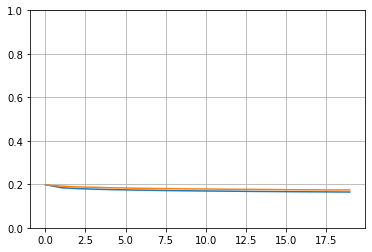

In [29]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Building Complex Models Using the Functional API

In [30]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [31]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Train on 5468 samples, validate on 1823 samples
Epoch 1/20
5468/5468 [==============================] - 1s 174us/sample - loss: 0.4554 - val_loss: 0.3322
Epoch 2/20
5468/5468 [==============================] - 0s 81us/sample - loss: 0.2749 - val_loss: 0.2466
Epoch 3/20
5468/5468 [==============================] - 0s 77us/sample - loss: 0.2172 - val_loss: 0.2125
Epoch 4/20
5468/5468 [==============================] - 0s 79us/sample - loss: 0.1929 - val_loss: 0.1971
Epoch 5/20
5468/5468 [==============================] - 0s 81us/sample - loss: 0.1816 - val_loss: 0.1897
Epoch 6/20
5468/5468 [==============================] - 1s 99us/sample - loss: 0.1760 - val_loss: 0.1857
Epoch 7/20
5468/5468 [==============================] - 1s 94us/sample - loss: 0.1728 - val_loss: 0.1838
Epoch 8/20
5468/5468 [==============================] - 1s 105us/sample - loss: 0.1707 - val_loss: 0.1817
Epoch 9/20
5468/5468 [==============================] - 1s 100us/sample - loss: 0.1691 - val_loss: 0.1801
Epoc

In [32]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [33]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 5468 samples, validate on 1823 samples
Epoch 1/20
5468/5468 [==============================] - 1s 179us/sample - loss: 0.3455 - val_loss: 0.2696
Epoch 2/20
5468/5468 [==============================] - 0s 80us/sample - loss: 0.2313 - val_loss: 0.2168
Epoch 3/20
5468/5468 [==============================] - 0s 82us/sample - loss: 0.1985 - val_loss: 0.1986
Epoch 4/20
5468/5468 [==============================] - 0s 78us/sample - loss: 0.1857 - val_loss: 0.1902
Epoch 5/20
5468/5468 [==============================] - 0s 82us/sample - loss: 0.1792 - val_loss: 0.1857
Epoch 6/20
5468/5468 [==============================] - 0s 77us/sample - loss: 0.1754 - val_loss: 0.1822
Epoch 7/20
5468/5468 [==============================] - 0s 77us/sample - loss: 0.1728 - val_loss: 0.1803
Epoch 8/20
5468/5468 [==============================] - 0s 80us/sample - loss: 0.1710 - val_loss: 0.1781
Epoch 9/20
5468/5468 [==============================] - 0s 83us/sample - loss: 0.1694 - val_loss: 0.1765
Epoch 

In [34]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [35]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [36]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 5468 samples, validate on 1823 samples
Epoch 1/20
5468/5468 [==============================] - 2s 356us/sample - loss: 0.2472 - main_output_loss: 0.2427 - aux_output_loss: 0.2872 - val_loss: 0.2394 - val_main_output_loss: 0.2333 - val_aux_output_loss: 0.2939
Epoch 2/20
5468/5468 [==============================] - 1s 105us/sample - loss: 0.2188 - main_output_loss: 0.2116 - aux_output_loss: 0.2836 - val_loss: 0.2201 - val_main_output_loss: 0.2122 - val_aux_output_loss: 0.2908
Epoch 3/20
5468/5468 [==============================] - 0s 90us/sample - loss: 0.2043 - main_output_loss: 0.1959 - aux_output_loss: 0.2809 - val_loss: 0.2088 - val_main_output_loss: 0.2000 - val_aux_output_loss: 0.2884
Epoch 4/20
5468/5468 [==============================] - 1s 98us/sample - loss: 0.1957 - main_output_loss: 0.1865 - aux_output_loss: 0.2789 - val_loss: 0.2016 - val_main_output_loss: 0.1922 - val_aux_output_loss: 0.2863
Epoch 5/20
5468/5468 [==============================] - 1s 94us/sample - l

In [37]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

2431/2431 [==============================] - 0s 41us/sample - loss: 0.1734 - main_output_loss: 0.1626 - aux_output_loss: 0.2702


In [38]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## Using the Subclassing API to Build Dynamic Models

In [39]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [40]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10, 
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 5468 samples, validate on 1823 samples
Epoch 1/10
5468/5468 [==============================] - 1s 245us/sample - loss: 0.4173 - output_1_loss: 0.4268 - output_2_loss: 0.3302 - val_loss: 0.2227 - val_output_1_loss: 0.2112 - val_output_2_loss: 0.3270
Epoch 2/10
5468/5468 [==============================] - 1s 107us/sample - loss: 0.2134 - output_1_loss: 0.2005 - output_2_loss: 0.3291 - val_loss: 0.2093 - val_output_1_loss: 0.1972 - val_output_2_loss: 0.3182
Epoch 3/10
5468/5468 [==============================] - 1s 108us/sample - loss: 0.2035 - output_1_loss: 0.1905 - output_2_loss: 0.3206 - val_loss: 0.2033 - val_output_1_loss: 0.1911 - val_output_2_loss: 0.3126
Epoch 4/10
5468/5468 [==============================] - 1s 110us/sample - loss: 0.1977 - output_1_loss: 0.1846 - output_2_loss: 0.3153 - val_loss: 0.1994 - val_output_1_loss: 0.1872 - val_output_2_loss: 0.3089
Epoch 5/10
5468/5468 [==============================] - 1s 108us/sample - loss: 0.1938 - output_1_loss: 0.1808 -

## Saving and Restoring

In [41]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [42]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [43]:
model.save("my_keras_model.h5")

In [44]:
model = keras.models.load_model("my_keras_model.h5")

## Using Callbacks

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [46]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [47]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Train on 5468 samples
Epoch 1/10
5468/5468 [==============================] - 1s 128us/sample - loss: 0.4313
Epoch 2/10
5468/5468 [==============================] - 0s 64us/sample - loss: 0.2829
Epoch 3/10
5468/5468 [==============================] - 0s 64us/sample - loss: 0.2271
Epoch 4/10
5468/5468 [==============================] - 0s 63us/sample - loss: 0.2032
Epoch 5/10
5468/5468 [==============================] - 0s 59us/sample - loss: 0.1917
Epoch 6/10
5468/5468 [==============================] - 0s 63us/sample - loss: 0.1858
Epoch 7/10
5468/5468 [==============================] - 0s 62us/sample - loss: 0.1822
Epoch 8/10
5468/5468 [==============================] - 0s 65us/sample - loss: 0.1800
Epoch 9/10
5468/5468 [==============================] - 0s 62us/sample - loss: 0.1781
Epoch 10/10
5468/5468 [==============================] - 0s 62us/sample - loss: 0.1766


In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") 
mse_test = model.evaluate(X_test, y_test)

Train on 5468 samples, validate on 1823 samples
Epoch 1/10
5468/5468 [==============================] - 1s 98us/sample - loss: 0.1755 - val_loss: 0.1792
Epoch 2/10
5468/5468 [==============================] - 0s 78us/sample - loss: 0.1743 - val_loss: 0.1784
Epoch 3/10
5468/5468 [==============================] - 0s 76us/sample - loss: 0.1731 - val_loss: 0.1770
Epoch 4/10
5468/5468 [==============================] - 0s 77us/sample - loss: 0.1721 - val_loss: 0.1768
Epoch 5/10
5468/5468 [==============================] - 0s 82us/sample - loss: 0.1713 - val_loss: 0.1755
Epoch 6/10
5468/5468 [==============================] - 0s 78us/sample - loss: 0.1704 - val_loss: 0.1748
Epoch 7/10
5468/5468 [==============================] - 0s 76us/sample - loss: 0.1697 - val_loss: 0.1738
Epoch 8/10
5468/5468 [==============================] - 0s 77us/sample - loss: 0.1690 - val_loss: 0.1731
Epoch 9/10
5468/5468 [==============================] - 0s 77us/sample - loss: 0.1683 - val_loss: 0.1727
Epoch 1

In [49]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Train on 5468 samples, validate on 1823 samples
Epoch 1/100
5468/5468 [==============================] - 1s 114us/sample - loss: 0.1673 - val_loss: 0.1713
Epoch 2/100
5468/5468 [==============================] - 0s 75us/sample - loss: 0.1667 - val_loss: 0.1710
Epoch 3/100
5468/5468 [==============================] - 0s 84us/sample - loss: 0.1661 - val_loss: 0.1715
Epoch 4/100
5468/5468 [==============================] - 1s 94us/sample - loss: 0.1659 - val_loss: 0.1704
Epoch 5/100
5468/5468 [==============================] - 1s 94us/sample - loss: 0.1654 - val_loss: 0.1698
Epoch 6/100
5468/5468 [==============================] - 1s 103us/sample - loss: 0.1650 - val_loss: 0.1693
Epoch 7/100
5468/5468 [==============================] - 1s 95us/sample - loss: 0.1646 - val_loss: 0.1691
Epoch 8/100
5468/5468 [==============================] - 1s 93us/sample - loss: 0.1641 - val_loss: 0.1689
Epoch 9/100
5468/5468 [==============================] - 1s 97us/sample - loss: 0.1638 - val_loss: 0.1

In [50]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [51]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Train on 5468 samples, validate on 1823 samples
4672/5468 [========================>.....] - ETA: 0s - loss: 0.1517
val/train: 1.04
5468/5468 [==============================] - 0s 87us/sample - loss: 0.1504 - val_loss: 0.1561


## Using TensorBoard for Visualization

In [52]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [53]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [54]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [55]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 5468 samples, validate on 1823 samples
Epoch 1/30
5468/5468 [==============================] - 1s 175us/sample - loss: 0.2725 - val_loss: 0.2419
Epoch 2/30
5468/5468 [==============================] - 0s 84us/sample - loss: 0.2264 - val_loss: 0.2152
Epoch 3/30
5468/5468 [==============================] - 1s 96us/sample - loss: 0.2047 - val_loss: 0.2007
Epoch 4/30
5468/5468 [==============================] - 1s 102us/sample - loss: 0.1922 - val_loss: 0.1922
Epoch 5/30
5468/5468 [==============================] - 1s 102us/sample - loss: 0.1846 - val_loss: 0.1868
Epoch 6/30
5468/5468 [==============================] - 1s 105us/sample - loss: 0.1797 - val_loss: 0.1832
Epoch 7/30
5468/5468 [==============================] - 1s 109us/sample - loss: 0.1763 - val_loss: 0.1805
Epoch 8/30
5468/5468 [==============================] - 1s 130us/sample - loss: 0.1738 - val_loss: 0.1785
Epoch 9/30
5468/5468 [==============================] - 1s 121us/sample - loss: 0.1720 - val_loss: 0.1769


In [1]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 20408), started 1 day, 21:46:05 ago. (Use '!kill 20408' to kill it.)

In [57]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2024_04_23-21_22_54'

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [59]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 5468 samples, validate on 1823 samples
Epoch 1/30
5468/5468 [==============================] - 1s 202us/sample - loss: 0.1735 - val_loss: 0.1638
Epoch 2/30
5468/5468 [==============================] - 0s 91us/sample - loss: 0.1574 - val_loss: 0.1621
Epoch 3/30
5468/5468 [==============================] - 1s 108us/sample - loss: 0.1565 - val_loss: 0.1572
Epoch 4/30
5468/5468 [==============================] - 1s 108us/sample - loss: 0.1515 - val_loss: 0.1543
Epoch 5/30
5468/5468 [==============================] - 1s 106us/sample - loss: 0.1506 - val_loss: 0.1721
Epoch 6/30
5468/5468 [==============================] - 1s 109us/sample - loss: 0.1489 - val_loss: 0.1515
Epoch 7/30
5468/5468 [==============================] - 1s 107us/sample - loss: 0.1476 - val_loss: 0.1503
Epoch 8/30
5468/5468 [==============================] - 1s 119us/sample - loss: 0.1465 - val_loss: 0.1551
Epoch 9/30
5468/5468 [==============================] - 0s 89us/sample - loss: 0.1455 - val_loss: 0.1494


## Fine-Tuning Neural Network Hyperparameters

In [60]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [61]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [62]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 5468 samples, validate on 1823 samples
Epoch 1/100
5468/5468 [==============================] - 1s 143us/sample - loss: 0.2880 - val_loss: 0.2040
Epoch 2/100
5468/5468 [==============================] - 0s 71us/sample - loss: 0.1856 - val_loss: 0.1871
Epoch 3/100
5468/5468 [==============================] - 0s 76us/sample - loss: 0.1751 - val_loss: 0.1796
Epoch 4/100
5468/5468 [==============================] - 0s 86us/sample - loss: 0.1699 - val_loss: 0.1753
Epoch 5/100
5468/5468 [==============================] - 0s 81us/sample - loss: 0.1663 - val_loss: 0.1718
Epoch 6/100
5468/5468 [==============================] - 1s 95us/sample - loss: 0.1638 - val_loss: 0.1693
Epoch 7/100
5468/5468 [==============================] - 0s 84us/sample - loss: 0.1622 - val_loss: 0.1670
Epoch 8/100
5468/5468 [==============================] - 0s 81us/sample - loss: 0.1609 - val_loss: 0.1656
Epoch 9/100
5468/5468 [==============================] - 0s 82us/sample - loss: 0.1600 - val_loss: 0.16

In [63]:
mse_test = keras_reg.score(X_test, y_test)

2431/2431 [==============================] - 0s 47us/sample - loss: 0.1518


In [64]:
y_pred = keras_reg.predict(X_new)

In [65]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Train on 3645 samples, validate on 1823 samples
Epoch 1/100
3645/3645 [==============================] - 1s 201us/sample - loss: 0.2395 - val_loss: 0.1744
Epoch 2/100
3645/3645 [==============================] - 0s 76us/sample - loss: 0.1608 - val_loss: 0.1672
Epoch 3/100
3645/3645 [==============================] - 0s 80us/sample - loss: 0.1563 - val_loss: 0.1650
Epoch 4/100
3645/3645 [==============================] - 0s 80us/sample - loss: 0.1542 - val_loss: 0.1622
Epoch 5/100
3645/3645 [==============================] - 0s 78us/sample - loss: 0.1524 - val_loss: 0.1608
Epoch 6/100
3645/3645 [==============================] - 0s 74us/sample - loss: 0.1515 - val_loss: 0.1597
Epoch 7/100
3645/3645 [==============================] - 0s 76us/sample - loss: 0.1501 - val_loss: 0.1581
Epoch 8/100
3645/3645 [==============================] - 0s 78us/sample - loss: 0.1501 - val_loss: 0.1585
Epoch 9/100
3645/3645 [===================

3645/3645 [==============================] - 0s 73us/sample - loss: 0.1386 - val_loss: 0.1502
Epoch 51/100
3645/3645 [==============================] - 0s 72us/sample - loss: 0.1384 - val_loss: 0.1483
Epoch 52/100
3645/3645 [==============================] - 0s 76us/sample - loss: 0.1383 - val_loss: 0.1483
Epoch 53/100
3645/3645 [==============================] - 0s 77us/sample - loss: 0.1378 - val_loss: 0.1493
Epoch 54/100
3645/3645 [==============================] - 0s 77us/sample - loss: 0.1374 - val_loss: 0.1539
Epoch 55/100
3645/3645 [==============================] - 0s 74us/sample - loss: 0.1378 - val_loss: 0.1488
Epoch 56/100
3645/3645 [==============================] - 0s 79us/sample - loss: 0.1372 - val_loss: 0.1485
Epoch 57/100
3645/3645 [==============================] - 0s 78us/sample - loss: 0.1372 - val_loss: 0.1497
Epoch 58/100
3645/3645 [==============================] - 0s 84us/sample - loss: 0.1367 - val_loss: 0.1516
Epoch 59/100
3645/3645 [==========================

1822/1822 [==============================] - 0s 35us/sample - loss: 0.1361
[CV] END learning_rate=0.013877510826065143, n_hidden=1, n_neurons=71; total time=  30.8s
Train on 3645 samples, validate on 1823 samples
Epoch 1/100
3645/3645 [==============================] - 1s 245us/sample - loss: 0.3999 - val_loss: 0.3209
Epoch 2/100
3645/3645 [==============================] - 0s 81us/sample - loss: 0.2878 - val_loss: 0.2584
Epoch 3/100
3645/3645 [==============================] - 0s 73us/sample - loss: 0.2368 - val_loss: 0.2269
Epoch 4/100
3645/3645 [==============================] - 0s 74us/sample - loss: 0.2101 - val_loss: 0.2102
Epoch 5/100
3645/3645 [==============================] - 0s 75us/sample - loss: 0.1952 - val_loss: 0.1999
Epoch 6/100
3645/3645 [==============================] - 0s 79us/sample - loss: 0.1862 - val_loss: 0.1938
Epoch 7/100
3645/3645 [==============================] - 0s 73us/sample - loss: 0.1803 - val_loss: 0.1896
Epoch 8/100
3645/3645 [=====================

3645/3645 [==============================] - 0s 73us/sample - loss: 0.1551 - val_loss: 0.1611
Epoch 49/100
3645/3645 [==============================] - 0s 71us/sample - loss: 0.1547 - val_loss: 0.1619
Epoch 50/100
3645/3645 [==============================] - 0s 78us/sample - loss: 0.1550 - val_loss: 0.1611
Epoch 51/100
3645/3645 [==============================] - 0s 73us/sample - loss: 0.1547 - val_loss: 0.1608
Epoch 52/100
3645/3645 [==============================] - 0s 72us/sample - loss: 0.1547 - val_loss: 0.1607
Epoch 53/100
3645/3645 [==============================] - 0s 78us/sample - loss: 0.1545 - val_loss: 0.1607
Epoch 54/100
3645/3645 [==============================] - 0s 90us/sample - loss: 0.1544 - val_loss: 0.1608
Epoch 55/100
3645/3645 [==============================] - 0s 91us/sample - loss: 0.1543 - val_loss: 0.1606
Epoch 56/100
3645/3645 [==============================] - 0s 85us/sample - loss: 0.1542 - val_loss: 0.1604
Epoch 57/100
3645/3645 [==========================

3646/3646 [==============================] - 0s 94us/sample - loss: 0.1530 - val_loss: 0.1623
Epoch 99/100
3646/3646 [==============================] - 0s 91us/sample - loss: 0.1530 - val_loss: 0.1617
Epoch 100/100
1822/1822 [==============================] - 0s 49us/sample - loss: 0.1503
[CV] END learning_rate=0.0011285740259814796, n_hidden=1, n_neurons=64; total time=  30.2s
Train on 3645 samples, validate on 1823 samples
Epoch 1/100
3645/3645 [==============================] - 1s 252us/sample - loss: 0.2495 - val_loss: 0.2039
Epoch 2/100
3645/3645 [==============================] - 0s 96us/sample - loss: 0.1823 - val_loss: 0.1804
Epoch 3/100
3645/3645 [==============================] - 0s 85us/sample - loss: 0.1669 - val_loss: 0.1715
Epoch 4/100
3645/3645 [==============================] - 0s 87us/sample - loss: 0.1604 - val_loss: 0.1678
Epoch 5/100
3645/3645 [==============================] - 0s 93us/sample - loss: 0.1575 - val_loss: 0.1660
Epoch 6/100
3645/3645 [=================

3645/3645 [==============================] - 0s 105us/sample - loss: 0.1442 - val_loss: 0.1552
Epoch 47/100
3645/3645 [==============================] - 0s 89us/sample - loss: 0.1438 - val_loss: 0.1547
Epoch 48/100
3645/3645 [==============================] - 0s 94us/sample - loss: 0.1436 - val_loss: 0.1552
Epoch 49/100
3645/3645 [==============================] - 0s 85us/sample - loss: 0.1435 - val_loss: 0.1540
Epoch 50/100
3645/3645 [==============================] - 0s 97us/sample - loss: 0.1430 - val_loss: 0.1563
Epoch 51/100
3645/3645 [==============================] - 0s 91us/sample - loss: 0.1431 - val_loss: 0.1536
Epoch 52/100
3645/3645 [==============================] - 0s 84us/sample - loss: 0.1431 - val_loss: 0.1542
Epoch 53/100
3645/3645 [==============================] - 0s 85us/sample - loss: 0.1427 - val_loss: 0.1534
Epoch 54/100
3645/3645 [==============================] - 0s 91us/sample - loss: 0.1423 - val_loss: 0.1534
Epoch 55/100
3645/3645 [=========================

3646/3646 [==============================] - 0s 119us/sample - loss: 0.1399 - val_loss: 0.1473
Epoch 97/100
3646/3646 [==============================] - 0s 124us/sample - loss: 0.1399 - val_loss: 0.1476
Epoch 98/100
3646/3646 [==============================] - 0s 117us/sample - loss: 0.1397 - val_loss: 0.1475
Epoch 99/100
3646/3646 [==============================] - 0s 109us/sample - loss: 0.1396 - val_loss: 0.1468
Epoch 100/100
1822/1822 [==============================] - 0s 42us/sample - loss: 0.1376
[CV] END learning_rate=0.003503069654796154, n_hidden=3, n_neurons=57; total time=  40.1s
Train on 3645 samples, validate on 1823 samples
Epoch 1/100
3645/3645 [==============================] - 1s 378us/sample - loss: 0.1762 - val_loss: 0.1702
Epoch 2/100
3645/3645 [==============================] - 1s 150us/sample - loss: 0.1557 - val_loss: 0.1639
Epoch 3/100
3645/3645 [==============================] - 0s 128us/sample - loss: 0.1523 - val_loss: 0.1616
Epoch 4/100
3645/3645 [==========

Epoch 70/100
3645/3645 [==============================] - 0s 118us/sample - loss: 0.1080 - val_loss: 0.1262
Epoch 71/100
3645/3645 [==============================] - 0s 117us/sample - loss: 0.1083 - val_loss: 0.1225
Epoch 72/100
3645/3645 [==============================] - 0s 90us/sample - loss: 0.1054 - val_loss: 0.1274
Epoch 73/100
3645/3645 [==============================] - 0s 126us/sample - loss: 0.1066 - val_loss: 0.1255
Epoch 74/100
3645/3645 [==============================] - 1s 195us/sample - loss: 0.1045 - val_loss: 0.1222
Epoch 75/100
3645/3645 [==============================] - 1s 141us/sample - loss: 0.1064 - val_loss: 0.1199
Epoch 76/100
3645/3645 [==============================] - 0s 111us/sample - loss: 0.1047 - val_loss: 0.1221
Epoch 77/100
3645/3645 [==============================] - 0s 89us/sample - loss: 0.1037 - val_loss: 0.1255
Epoch 78/100
3645/3645 [==============================] - 0s 93us/sample - loss: 0.1025 - val_loss: 0.1462
Epoch 79/100
3645/3645 [=======

3645/3645 [==============================] - 0s 120us/sample - loss: 0.1163 - val_loss: 0.1287
Epoch 45/100
3645/3645 [==============================] - 0s 100us/sample - loss: 0.1168 - val_loss: 0.1265
Epoch 46/100
3645/3645 [==============================] - 0s 94us/sample - loss: 0.1161 - val_loss: 0.1272
Epoch 47/100
3645/3645 [==============================] - 0s 94us/sample - loss: 0.1148 - val_loss: 0.1308
Epoch 48/100
3645/3645 [==============================] - 0s 120us/sample - loss: 0.1144 - val_loss: 0.1256
Epoch 49/100
3645/3645 [==============================] - 0s 128us/sample - loss: 0.1138 - val_loss: 0.1256
Epoch 50/100
3645/3645 [==============================] - 1s 156us/sample - loss: 0.1135 - val_loss: 0.1301
Epoch 51/100
3645/3645 [==============================] - ETA: 0s - loss: 0.112 - 0s 125us/sample - loss: 0.1133 - val_loss: 0.1258
Epoch 52/100
3645/3645 [==============================] - 0s 111us/sample - loss: 0.1128 - val_loss: 0.1239
Epoch 53/100
3645/3

Epoch 18/100
3646/3646 [==============================] - 0s 87us/sample - loss: 0.1356 - val_loss: 0.1435
Epoch 19/100
3646/3646 [==============================] - 0s 110us/sample - loss: 0.1349 - val_loss: 0.1434
Epoch 20/100
3646/3646 [==============================] - 0s 118us/sample - loss: 0.1339 - val_loss: 0.1462
Epoch 21/100
3646/3646 [==============================] - 0s 108us/sample - loss: 0.1332 - val_loss: 0.1437
Epoch 22/100
3646/3646 [==============================] - 0s 104us/sample - loss: 0.1328 - val_loss: 0.1408
Epoch 23/100
3646/3646 [==============================] - 0s 106us/sample - loss: 0.1313 - val_loss: 0.1413
Epoch 24/100
3646/3646 [==============================] - 0s 103us/sample - loss: 0.1321 - val_loss: 0.1456
Epoch 25/100
3646/3646 [==============================] - 0s 104us/sample - loss: 0.1307 - val_loss: 0.1389
Epoch 26/100
3646/3646 [==============================] - 0s 111us/sample - loss: 0.1295 - val_loss: 0.1378
Epoch 27/100
3646/3646 [=====

3645/3645 [==============================] - 0s 100us/sample - loss: 0.1559 - val_loss: 0.1670
Epoch 68/100
3645/3645 [==============================] - 0s 116us/sample - loss: 0.1556 - val_loss: 0.1675
Epoch 69/100
3645/3645 [==============================] - 0s 104us/sample - loss: 0.1556 - val_loss: 0.1665
Epoch 70/100
3645/3645 [==============================] - 0s 91us/sample - loss: 0.1553 - val_loss: 0.1662
Epoch 71/100
3645/3645 [==============================] - 0s 109us/sample - loss: 0.1552 - val_loss: 0.1663
Epoch 72/100
3645/3645 [==============================] - 0s 99us/sample - loss: 0.1551 - val_loss: 0.1658
Epoch 73/100
3645/3645 [==============================] - 0s 114us/sample - loss: 0.1549 - val_loss: 0.1658
Epoch 74/100
3645/3645 [==============================] - 0s 123us/sample - loss: 0.1548 - val_loss: 0.1655
Epoch 75/100
3645/3645 [==============================] - 0s 96us/sample - loss: 0.1546 - val_loss: 0.1653
Epoch 76/100
3645/3645 [====================

3646/3646 [==============================] - 0s 102us/sample - loss: 0.1968 - val_loss: 0.2031
Epoch 16/100
3646/3646 [==============================] - 0s 76us/sample - loss: 0.1944 - val_loss: 0.2010
Epoch 17/100
3646/3646 [==============================] - 0s 70us/sample - loss: 0.1922 - val_loss: 0.1988
Epoch 18/100
3646/3646 [==============================] - 0s 70us/sample - loss: 0.1905 - val_loss: 0.1972
Epoch 19/100
3646/3646 [==============================] - 0s 77us/sample - loss: 0.1887 - val_loss: 0.1955
Epoch 20/100
3646/3646 [==============================] - 0s 68us/sample - loss: 0.1871 - val_loss: 0.1940
Epoch 21/100
3646/3646 [==============================] - 0s 69us/sample - loss: 0.1856 - val_loss: 0.1927
Epoch 22/100
3646/3646 [==============================] - 0s 73us/sample - loss: 0.1842 - val_loss: 0.1914
Epoch 23/100
3646/3646 [==============================] - 0s 77us/sample - loss: 0.1830 - val_loss: 0.1901
Epoch 24/100
3646/3646 [=========================

3645/3645 [==============================] - 0s 75us/sample - loss: 0.1553 - val_loss: 0.1654
Epoch 66/100
3645/3645 [==============================] - 0s 71us/sample - loss: 0.1551 - val_loss: 0.1657
Epoch 67/100
3645/3645 [==============================] - 0s 74us/sample - loss: 0.1554 - val_loss: 0.1653
Epoch 68/100
3645/3645 [==============================] - 0s 73us/sample - loss: 0.1552 - val_loss: 0.1658
Epoch 69/100
3645/3645 [==============================] - 0s 73us/sample - loss: 0.1553 - val_loss: 0.1653
Epoch 70/100
3645/3645 [==============================] - 0s 71us/sample - loss: 0.1553 - val_loss: 0.1657
Epoch 71/100
3645/3645 [==============================] - 0s 78us/sample - loss: 0.1553 - val_loss: 0.1650
Epoch 72/100
3645/3645 [==============================] - 0s 93us/sample - loss: 0.1551 - val_loss: 0.1646
Epoch 73/100
3645/3645 [==============================] - 0s 95us/sample - loss: 0.1553 - val_loss: 0.1651
Epoch 74/100
3645/3645 [==========================

Epoch 58/100
3645/3645 [==============================] - 0s 62us/sample - loss: 0.1591 - val_loss: 0.1651
Epoch 59/100
3645/3645 [==============================] - 0s 105us/sample - loss: 0.1590 - val_loss: 0.1655
Epoch 60/100
3645/3645 [==============================] - 0s 88us/sample - loss: 0.1590 - val_loss: 0.1653
Epoch 61/100
3645/3645 [==============================] - 0s 70us/sample - loss: 0.1590 - val_loss: 0.1650
Epoch 62/100
3645/3645 [==============================] - 0s 52us/sample - loss: 0.1590 - val_loss: 0.1649
Epoch 63/100
3645/3645 [==============================] - 0s 56us/sample - loss: 0.1591 - val_loss: 0.1654
Epoch 64/100
3645/3645 [==============================] - 0s 51us/sample - loss: 0.1590 - val_loss: 0.1651
Epoch 65/100
3645/3645 [==============================] - 0s 48us/sample - loss: 0.1590 - val_loss: 0.1652
Epoch 66/100
3645/3645 [==============================] - 0s 48us/sample - loss: 0.1590 - val_loss: 0.1653
Epoch 67/100
3645/3645 [============

3645/3645 [==============================] - 0s 107us/sample - loss: 0.1537 - val_loss: 0.1633
Epoch 49/100
3645/3645 [==============================] - 0s 120us/sample - loss: 0.1535 - val_loss: 0.1632
Epoch 50/100
3645/3645 [==============================] - 0s 105us/sample - loss: 0.1534 - val_loss: 0.1631
Epoch 51/100
3645/3645 [==============================] - 0s 107us/sample - loss: 0.1532 - val_loss: 0.1628
Epoch 52/100
3645/3645 [==============================] - 0s 122us/sample - loss: 0.1531 - val_loss: 0.1630
Epoch 53/100
3645/3645 [==============================] - 0s 109us/sample - loss: 0.1530 - val_loss: 0.1627
Epoch 54/100
3645/3645 [==============================] - 0s 101us/sample - loss: 0.1528 - val_loss: 0.1625
Epoch 55/100
3645/3645 [==============================] - 0s 115us/sample - loss: 0.1527 - val_loss: 0.1627
Epoch 56/100
3645/3645 [==============================] - 0s 101us/sample - loss: 0.1525 - val_loss: 0.1623
Epoch 57/100
3645/3645 [=================

3645/3645 [==============================] - 0s 83us/sample - loss: 0.1493 - val_loss: 0.1581
Epoch 99/100
3645/3645 [==============================] - 0s 101us/sample - loss: 0.1492 - val_loss: 0.1580
Epoch 100/100
1823/1823 [==============================] - 0s 32us/sample - loss: 0.1498
[CV] END learning_rate=0.0008265454655262932, n_hidden=3, n_neurons=57; total time=  41.2s
Train on 3646 samples, validate on 1823 samples
Epoch 1/100
3646/3646 [==============================] - 1s 270us/sample - loss: 0.4064 - val_loss: 0.3213
Epoch 2/100
3646/3646 [==============================] - 0s 105us/sample - loss: 0.2896 - val_loss: 0.2713
Epoch 3/100
3646/3646 [==============================] - 0s 96us/sample - loss: 0.2553 - val_loss: 0.2465
Epoch 4/100
3646/3646 [==============================] - 0s 93us/sample - loss: 0.2345 - val_loss: 0.2293
Epoch 5/100
3646/3646 [==============================] - 0s 100us/sample - loss: 0.2193 - val_loss: 0.2165
Epoch 6/100
3646/3646 [==============

3645/3645 [==============================] - 0s 73us/sample - loss: 0.1501 - val_loss: 0.1631
Epoch 47/100
3645/3645 [==============================] - 0s 72us/sample - loss: 0.1500 - val_loss: 0.1628
Epoch 48/100
3645/3645 [==============================] - 0s 75us/sample - loss: 0.1499 - val_loss: 0.1630
Epoch 49/100
3645/3645 [==============================] - 0s 73us/sample - loss: 0.1498 - val_loss: 0.1627
Epoch 50/100
3645/3645 [==============================] - 0s 73us/sample - loss: 0.1496 - val_loss: 0.1628
Epoch 51/100
3645/3645 [==============================] - 0s 73us/sample - loss: 0.1495 - val_loss: 0.1623
Epoch 52/100
3645/3645 [==============================] - 0s 78us/sample - loss: 0.1494 - val_loss: 0.1620
Epoch 53/100
3645/3645 [==============================] - 0s 76us/sample - loss: 0.1493 - val_loss: 0.1620
Epoch 54/100
3645/3645 [==============================] - 0s 72us/sample - loss: 0.1493 - val_loss: 0.1622
Epoch 55/100
3645/3645 [==========================

3645/3645 [==============================] - 0s 90us/sample - loss: 0.1468 - val_loss: 0.1560
Epoch 97/100
3645/3645 [==============================] - 0s 81us/sample - loss: 0.1468 - val_loss: 0.1561
Epoch 98/100
3645/3645 [==============================] - 0s 81us/sample - loss: 0.1464 - val_loss: 0.1562
Epoch 99/100
3645/3645 [==============================] - 0s 85us/sample - loss: 0.1465 - val_loss: 0.1559
Epoch 100/100
1823/1823 [==============================] - 0s 36us/sample - loss: 0.1462
[CV] END learning_rate=0.0018323516696037243, n_hidden=2, n_neurons=21; total time=  33.7s
Train on 3646 samples, validate on 1823 samples
Epoch 1/100
3646/3646 [==============================] - 1s 218us/sample - loss: 0.3107 - val_loss: 0.2850
Epoch 2/100
3646/3646 [==============================] - 0s 80us/sample - loss: 0.2568 - val_loss: 0.2518
Epoch 3/100
3646/3646 [==============================] - 0s 88us/sample - loss: 0.2301 - val_loss: 0.2314
Epoch 4/100
3646/3646 [===============

3645/3645 [==============================] - 0s 68us/sample - loss: 0.1405 - val_loss: 0.1583
Epoch 45/100
3645/3645 [==============================] - 0s 71us/sample - loss: 0.1402 - val_loss: 0.1528
Epoch 46/100
3645/3645 [==============================] - 0s 88us/sample - loss: 0.1399 - val_loss: 0.1534
Epoch 47/100
3645/3645 [==============================] - 0s 79us/sample - loss: 0.1395 - val_loss: 0.1575
Epoch 48/100
3645/3645 [==============================] - 0s 83us/sample - loss: 0.1405 - val_loss: 0.1554
Epoch 49/100
3645/3645 [==============================] - 0s 92us/sample - loss: 0.1401 - val_loss: 0.1544
Epoch 50/100
3645/3645 [==============================] - 0s 88us/sample - loss: 0.1392 - val_loss: 0.1594
Epoch 51/100
3645/3645 [==============================] - 0s 106us/sample - loss: 0.1402 - val_loss: 0.1533
Epoch 52/100
3645/3645 [==============================] - 0s 112us/sample - loss: 0.1394 - val_loss: 0.1530
Epoch 53/100
3645/3645 [========================

3645/3645 [==============================] - 0s 82us/sample - loss: 0.1342 - val_loss: 0.1450
Epoch 95/100
3645/3645 [==============================] - 0s 87us/sample - loss: 0.1344 - val_loss: 0.1459
Epoch 96/100
3645/3645 [==============================] - 0s 76us/sample - loss: 0.1341 - val_loss: 0.1468
Epoch 97/100
3645/3645 [==============================] - 0s 93us/sample - loss: 0.1337 - val_loss: 0.1471
Epoch 98/100
3645/3645 [==============================] - 0s 96us/sample - loss: 0.1335 - val_loss: 0.1445
Epoch 99/100
3645/3645 [==============================] - 0s 103us/sample - loss: 0.1337 - val_loss: 0.1439
Epoch 100/100
1823/1823 [==============================] - 0s 36us/sample - loss: 0.1357
[CV] END learning_rate=0.011826619302953725, n_hidden=1, n_neurons=68; total time=  32.8s
Train on 3646 samples, validate on 1823 samples
Epoch 1/100
3646/3646 [==============================] - 1s 264us/sample - loss: 0.2195 - val_loss: 0.1863
Epoch 2/100
3646/3646 [=============

3645/3645 [==============================] - 0s 68us/sample - loss: 0.3085 - val_loss: 0.2767
Epoch 3/100
3645/3645 [==============================] - 0s 55us/sample - loss: 0.2418 - val_loss: 0.2415
Epoch 4/100
3645/3645 [==============================] - 0s 57us/sample - loss: 0.2159 - val_loss: 0.2226
Epoch 5/100
3645/3645 [==============================] - 0s 59us/sample - loss: 0.2009 - val_loss: 0.2096
Epoch 6/100
3645/3645 [==============================] - 0s 59us/sample - loss: 0.1906 - val_loss: 0.2005
Epoch 7/100
3645/3645 [==============================] - 0s 67us/sample - loss: 0.1834 - val_loss: 0.1937
Epoch 8/100
3645/3645 [==============================] - 0s 77us/sample - loss: 0.1782 - val_loss: 0.1885
Epoch 9/100
3645/3645 [==============================] - 0s 80us/sample - loss: 0.1743 - val_loss: 0.1845
Epoch 10/100
3645/3645 [==============================] - 0s 59us/sample - loss: 0.1715 - val_loss: 0.1813
Epoch 11/100
3645/3645 [==============================] -

Epoch 11/100
5468/5468 [==============================] - 1s 108us/sample - loss: 0.1391 - val_loss: 0.1522
Epoch 12/100
5468/5468 [==============================] - 0s 91us/sample - loss: 0.1383 - val_loss: 0.1470
Epoch 13/100
5468/5468 [==============================] - 0s 91us/sample - loss: 0.1370 - val_loss: 0.1484
Epoch 14/100
5468/5468 [==============================] - 1s 109us/sample - loss: 0.1365 - val_loss: 0.1460
Epoch 15/100
5468/5468 [==============================] - 1s 97us/sample - loss: 0.1349 - val_loss: 0.1488
Epoch 16/100
5468/5468 [==============================] - 0s 88us/sample - loss: 0.1342 - val_loss: 0.1438
Epoch 17/100
5468/5468 [==============================] - 0s 88us/sample - loss: 0.1335 - val_loss: 0.1423
Epoch 18/100
5468/5468 [==============================] - 0s 90us/sample - loss: 0.1321 - val_loss: 0.1449
Epoch 19/100
5468/5468 [==============================] - 1s 93us/sample - loss: 0.1320 - val_loss: 0.1426
Epoch 20/100
5468/5468 [===========

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000021DF5680BA8>,
                   param_distributions={'learning_rate': [0.01245116684194342,
                                                          0.0003977593352422101,
                                                          0.0004974241525136969,
                                                          0.00034691756530475556,
                                                          0.022674128446224233,
                                                          0.0005220921004947262,
                                                          0.0036491210271799215,
                                                          0.018975890989256252,
                                                          0.00634129747346...
                                                          0.0014777789176957427,
                                                 

In [66]:
rnd_search_cv.best_params_

{'n_neurons': 99, 'n_hidden': 3, 'learning_rate': 0.017926272076224836}

In [67]:
rnd_search_cv.best_score_

-0.11013533873275105

In [68]:
model = rnd_search_cv.best_estimator_.model

In [69]:
model.evaluate(X_test, y_test)

2431/2431 [==============================] - 0s 72us/sample - loss: 0.1060


0.10597545393071808